In [25]:
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
%matplotlib inline

# Data Processing

## Data Loading

The data is split into six csv files. We load them all into panda DataFrames.

In [2]:
p = "data/"

# Load data in DataFrame
aisles = pd.read_csv(p + "aisles.csv")
departments = pd.read_csv(p + "departments.csv")
order_products_prior = pd.read_csv(p + "order_products__prior.csv")
order_products_train = pd.read_csv(p + "order_products__train.csv")
orders = pd.read_csv(p + "orders.csv")
products = pd.read_csv(p + "products.csv")

## Initial Preview of Data

Lets display the head of every table to understand what each table contains.

In [48]:
dfs = [aisles, departments, order_products_prior, order_products_train, orders, products]
names = ["aisles", "departments", "order_products_prior", "order_products_train", "orders", "products"]

for df, name in zip(dfs, names):
    # Display name, info, and head of each df
    print(f"Name: {name}\nSize: {df.shape}")
    display(df.info())
    display(df.head())
    print("\n\n")

Name: aisles
Size: (134, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation





Name: departments
Size: (21, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol





Name: order_products_prior
Size: (32434489, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0





Name: order_products_train
Size: (1384617, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


None

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1





Name: orders
Size: (3421083, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


None

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0





Name: products
Size: (49688, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Data Cleaning

### Which columns have missing values?

In [171]:
def get_columns_w_null(df):
    """ Returns a list of columns in df that contain missing values """
    contains_null = []
    for column in df.columns:
        if len(df[df[column].isnull()]) > 0:
            contains_null.append(column)
    return contains_null

In [274]:
print("---- DataFrame ---- : -- Columns w/ Missing Values --")
for df, name in zip(dfs, names):
    print(f"{name:20}: {get_columns_w_null(df)}")

---- DataFrame ---- : -- Columns w/ Missing Values --
aisles              : []
departments         : []
order_products_prior: []
order_products_train: []
orders              : ['days_since_prior_order']
products            : []


### What percentage of the data is missing?

Only column `days_since_prior_order` in `orders` appears to contain missing values.

In [360]:
def plot_hist(x, bins, bw, title):
    """ Creates a histogram of x """
    sns.distplot(x, bins=bins, hist_kws=dict(ec="k"), kde_kws={"bw":bw})
    plt.title("Histogram of " + title)
    plt.xlabel(title)
    plt.grid();

  Number null:  206209
        Total: 3421083
 Percent null:    6.0%


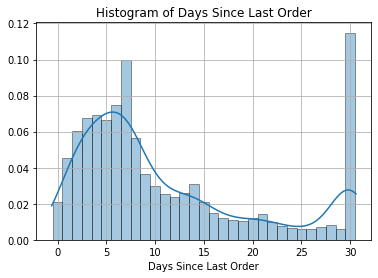

In [370]:
num_null = len(orders[orders['days_since_prior_order'].isnull()])
total = len(orders)
percent_null_vals = num_null / total * 100
print(f"  Number null: {num_null:7}")
print(f"        Total: {total:7}")
print(f" Percent null: {percent_null_vals:6.2}%")
plot_hist(orders["days_since_prior_order"], np.arange(31.5)-0.5, .2, 
          "Days Since Last Order")

The following description is given for this column:

>`days_since_prior_order`: days since the last order, capped at 30 (with NAs for order_number = 1)

Given that 

- there are already values for 0 and 1 day since the last order, and
- the values are capped at 30,

it is difficult to understand what these missing values mean.

It could be that 

1. values over 30 are assigned the missing value, or
2. these entries with missing values correspond to first-time orders for a given user, hence no previous orders, or
3. these entries simply do not have information for this column.

Since the percentage of entries with value = 30 is large, it is likely that values over 30 are actually truncated and listed as 30 (since it's unlikely that ~12% of re-orders are at exactly 30 days). This means that either idea (2) or (3) is likely correct. 

These entries will be removed from the `orders` DataFrame, as we do not know which of idea (2) or (3) is correct.

In [375]:
orders = orders[orders['days_since_prior_order'].isnull() == False]

### What are in the `order_products_*` DataFrames?
Since `order_products_prior` and `order_products_train` are meant to be used for machine learning purposes and we want to do exploratory data analysis first, we can examine the DataFrames and potentially join them. This would allow for all the useful information we need to be in a single DataFrame

In [440]:
print(f"order_products_prior\n size = {order_products_prior.shape}")
display(order_products_prior.head())
print("\n")
print(f"order_products_train\n size = {order_products_train.shape}")
display(order_products_train.head())

order_products_prior
 size = (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0




order_products_train
 size = (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [441]:
order_products = order_products_prior.append(order_products_train)
print(f"order_products\n size = {order_products.shape}")
display(order_products.head())

order_products
 size = (33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


# Exploratory Data Analysis

### What times of day are most orders placed?

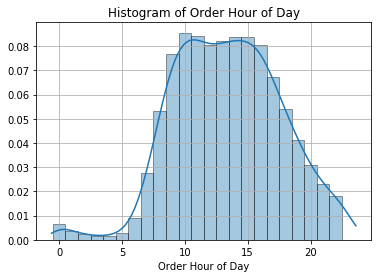

In [378]:
plot_hist(orders["order_hour_of_day"], np.arange(0,24)-0.5, .2, 
          "Order Hour of Day")

Most orders are placed from 8 AM to 6 PM.

### What percentage of orders are placed from 8 AM to 6 PM?

In [391]:
orders_6to8 = orders[(orders["order_hour_of_day"] >= 6) &
                     (orders["order_hour_of_day"] <= 18)]
percent_6to8 = len(orders_6to8) / total * 100
print(f"Orders placed from 8 AM to 6 PM: {percent_6to8:.4}%")

Orders placed from 8 AM to 6 PM: 85.79%


### On what days of the week are most orders placed?

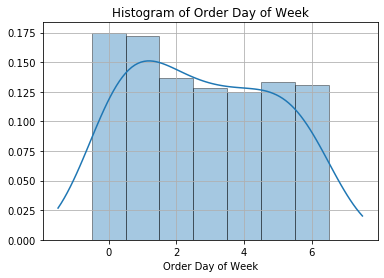

In [395]:
plot_hist(orders["order_dow"], np.arange(0,7.5)-0.5, .5, 
          "Order Day of Week")

### What are the most-ordered products?

In [492]:
# DataFrame with columns 'product_id' and 'count'
counts = order_products['product_id'].value_counts()
counts = counts.reset_index(
    name='count').rename(columns={'index':'product_id'})

# Make copy of 'products' DataFrame and add product 'count' column
product_counts = products.merge(
    counts, how='inner', on='product_id')

In [495]:
top_50 = product_counts.sort_values('count', ascending=False)
top_50.head(10)

,product_id,product_name,aisle_id,department_id,count
24849,24852,Banana,24,4,491291
13173,13176,Bag of Organic Bananas,24,4,394930
21134,21137,Organic Strawberries,24,4,275577
21900,21903,Organic Baby Spinach,123,4,251705
47205,47209,Organic Hass Avocado,24,4,220877
47762,47766,Organic Avocado,24,4,184224
47622,47626,Large Lemon,24,4,160792
16794,16797,Strawberries,24,4,149445
26206,26209,Limes,24,4,146660
27842,27845,Organic Whole Milk,84,16,142813
